In [11]:
import math
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import linalg
%matplotlib inline

In [71]:
def isComplex(value):
    """
    Проверит является ли число комплексным
 
    :param value: число тип которго надо проверить
    :return:
    """
    return (isinstance(value, complex) # комплексный тип
                and (value.imag != 0)) # мнимая часть не равна нулю

In [12]:
def sqrt(x):
    if x >= 0:
        return math.sqrt(x)
    return float('NaN')

In [13]:
# a = math.e ** (x2 / (1 + x2 / p3))
def yakobi(p1, p2, p3, p4, x1, x2):
    a = math.e ** (x2 / (1 + x2 / p3))
    x00 = -p1 - p2 * a
    x01 = p2 * (1 - x1) * a / ((1 + x2 / p3) ** 2)
    x11 = - (p1 + p5 - ( p2 * p4 * a * (1 - x1)/((1 + x2 / p3) ** 2)) )
    x10 = -1 * p2 * p4 * a
    lambdas = np.linalg.eig(np.matrix('{} {}; {} {}'.format(x00, x01, x10, x11)))
    #print(lambdas)
    #print (' ---- ', '{} {}; {} {}'.format(x00, x01, x10, x11), ' ---- ' )
    return ('{} \t {} \t {}'.format('%.1f' % (x00+x11), np.around(lambdas[0][0], decimals=2),np.around(lambdas[0][1], decimals=2)))




In [38]:
def yakobi_(p1, p2, p3, p4, x1, x2):
    a = math.e ** (x2 / (1 + x2 / p3))
    x00 = -p1 - p2 * a
    x01 = p2 * (1 - x1) * a / ((1 + x2 / p3) ** 2)
    x11 = - (p1 + p5 - ( p2 * p4 * a * (1 - x1)/((1 + x2 / p3) ** 2)) )
    x10 = -1 * p2 * p4 * a
    lambdas = np.linalg.eig(np.matrix('{} {}; {} {}'.format(x00, x01, x10, x11)))
    #print(lambdas)
    #print (' ---- ', '{} {}; {} {}'.format(x00, x01, x10, x11), ' ---- ' )
    return (x00+x11)


In [14]:
def yakobi_test(p1, p2, p3, p4, x1, x2):
    a = math.e ** (x2 / (1 + x2 / p3))
    x00 = -p1 - p2 * a
    x01 = p2 * (1 - x1) * a / ((1 + x2 / p3) ** 2)
    x11 = - (p1 + p5 - ( p2 * p4 * a * (1 - x1)/((1 + x2 / p3) ** 2)) )
    x10 = -1 * p2 * p4 * a
    lambdas = np.linalg.eig(np.matrix('{} {}; {} {}'.format(x00, x01, x10, x11)))
    if isComplex(lambdas[0][0]) and isComplex(lambdas[0][1]):
        return True
    return False



In [180]:
def yakobi_test_r(p1, p2, p3, p4, x1, x2):
    a = math.e ** (x2 / (1 + x2 / p3))
    x00 = -p1 - p2 * a
    x01 = p2 * (1 - x1) * a / ((1 + x2 / p3) ** 2)
    x11 = - (p1 + p5 - ( p2 * p4 * a * (1 - x1)/((1 + x2 / p3) ** 2)) )
    x10 = -1 * p2 * p4 * a
    lambdas = np.linalg.eig(np.matrix('{} {}; {} {}'.format(x00, x01, x10, x11)))
    d = 0.1
    #print('{} or {} < {} is {}'.format(lambdas[0][0]**2, lambdas[0][1]**2, d**2, (( (lambdas[0][0])**2 <= d ** 2) or ( (lambdas[0][1]**2 <= d ** 2)))))
    #print((( (lambdas[0][0])**2 <= d ** 2) or ( (lambdas[0][1]**2 <= d ** 2))))
    return (( (lambdas[0][0])**2 <= d ** 2) or ( (lambdas[0][1]**2 <= d ** 2)))
  



![title](ex.png)

In [15]:
def ex1(x1, x2, p1, p2, p3):
    return -p1*x1 + p2*(1-x1)*math.e ** (x2 / (1 + x2 / p3))
def ex2(x1, x2, p1, p2, p3, p4, p6):
    return -p1*x2 + p2*p4*(1-x1)*math.e ** (x2 / (1 + x2 / p3)) - p5 * (x2 - p6)

In [168]:
#A
p1 = 1
p3 = 20
p4 = 10
p5 = 0.6
p6 = -5

In [115]:
#B
p1 = 0.5
p3 = math.inf
p4 = 8#[8, 10, 12, 14]
p5 = 0.8
p6 = 0

In [229]:
def process(parameters):
    p1,p3,p4,p5,p6 = parameters
    eps = 0.1
    for_graph = [] # Значения p2 и p5 для графиков

    out_all = open('out.txt', 'w+')
    out_all.write('x2\tx1\tp2\t diagonal_sum\tlambda1\t lambda2\tequation1\tequation2\n')


    x2 = -5
    x1_val = []
    x2_val = []
    p2_val = []

    x1_val_ = []
    x2_val_ = []
    p2_val_ = []

    x1_val_a = []
    x2_val_a = []
    p2_val_a = []

    x1_val_r = []
    x2_val_r = []
    p2_val_r = []

    delta = 0.1

    while (x2 <= 2):

        x2 += eps 

        x1 = ( p1 * x2 + p5 * (x2 - p6) ) / (p4 * p1)
        p2 = x1 / ((1 - x1) * math.e ** (x2 / (1 + x2 / p3)))

        if (p2 > 0) and (x1 > 0) and (x1 < 1) : #and ( yakobi_test(p1, p2, p3, p4, x1, x2)):
            eq1 = ex1(x1, x2, p1, p2, p3)
            eq2= ex2(x1, x2, p1, p2, p3, p4, p6)
            if (eq1 >= -1*delta and eq1 <= delta) and (eq2 >= -1*delta and eq2 <= delta):
                x1_val.append(x1)
                x2_val.append(x2)
                p2_val.append(p2)
            if ( (yakobi_(p1, p2, p3, p4, x1, x2)) <= delta ) and  ( (yakobi_(p1, p2, p3, p4, x1, x2)) >= -1 * delta):
                x1_val_.append(x1)
                x2_val_.append(x2)
                p2_val_.append(p2)

            if yakobi_test(p1, p2, p3, p4, x1, x2):
                x1_val_a.append(x1)
                x2_val_a.append(x2)
                p2_val_a.append(p2)
            if yakobi_test_r(p1, p2, p3, p4, x1, x2):
                x1_val_r.append(x1)
                x2_val_r.append(x2)
                p2_val_r.append(p2)

            out_all.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('%.1f' % x2,'%.2f' % x1,'%.4f' % p2, yakobi(p1, p2, p3, p4, x1, x2),'%.1f' % eq1,'%.1f' %  eq2 ))  # Выписываем в таблицу  
    out_all.close()
    
    print(' Параметры: \n p1 = {}, p3 = {}, p4 = {} , p5 = {}, p6 = {}'.format(p1, p3, p4, p5, p6))
    plt.xlabel('x2')
    plt.ylabel('p2')
    plt.title('Стационарные точки')
    plt.scatter(x2_val,p2_val, color='green')
    plt.show()
    
    plt.xlabel('x1')
    plt.ylabel('p2')
    plt.title('Стационарные точки')
    plt.scatter(x1_val, p2_val,  color='green')
    plt.show()
    
    plt.xlabel('x2')
    plt.ylabel('p2')
    plt.title('Устойчивые точки')
    plt.scatter(x1_val, p2_val,  color='green')
    plt.scatter(x1_val_, p2_val_,  color='red')
    plt.show()
    
    plt.xlabel('x1')
    plt.ylabel('p2')
    plt.title('Устойчивые точки')
    plt.scatter(x2_val, p2_val,  color='green')
    plt.scatter(x2_val_, p2_val_,  color='red')
    plt.show()
    
    plt.xlabel('x2')
    plt.ylabel('p2')
    plt.title('Бифуркации')
    plt.scatter(x2_val,p2_val, color='green')
    plt.scatter(x2_val_r,p2_val_r)
    plt.scatter(x2_val_a,p2_val_a, color='orange')
    plt.show()
    
    plt.xlabel('x1')
    plt.ylabel('p2')
    plt.title('Бифуркации')
    plt.scatter(x1_val, p2_val,  color='green')
    plt.scatter(x1_val_r,p2_val_r)
    plt.scatter(x1_val_a,p2_val_a, color='orange')
    plt.show()
    # Не нашлось точек для p4 = 6 и 8, только 10 и 12!






 Вариант А
 Параметры: 
 p1 = 1, p3 = 20, p4 = 10 , p5 = 0.6, p6 = -5


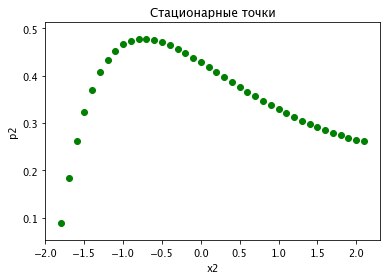

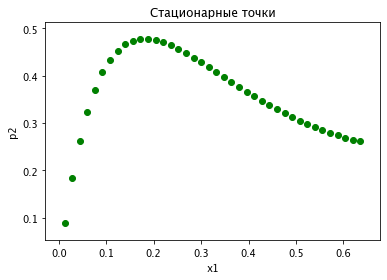

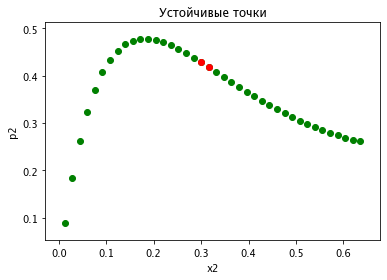

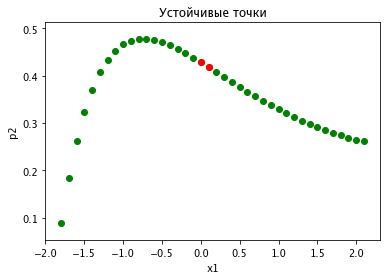

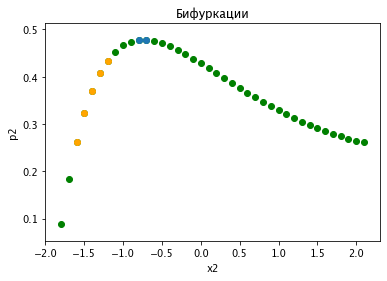

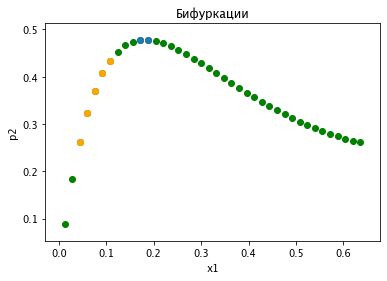

In [225]:
print(' Вариант А')
process((1, 20, 10, 0.6, -5))

 Вариант Б 
 Параметры: 
 p1 = 0.5, p3 = inf, p4 = 8 , p5 = 0.8, p6 = 0


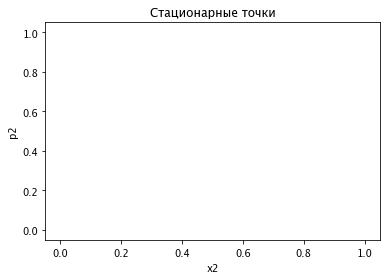

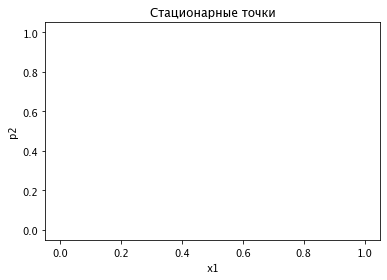

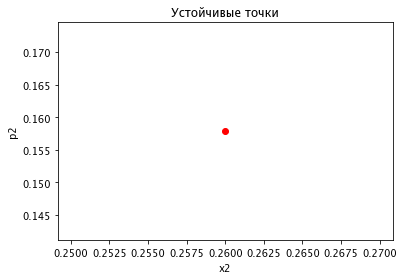

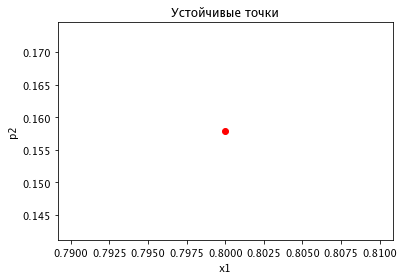

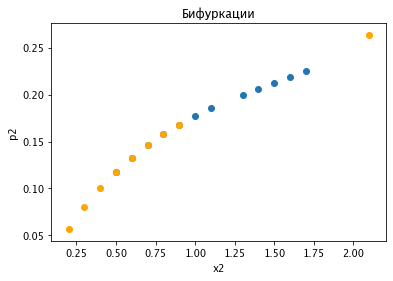

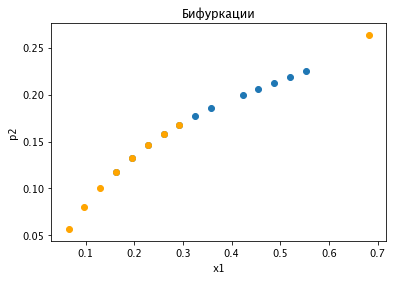

 Параметры: 
 p1 = 0.5, p3 = inf, p4 = 10 , p5 = 0.8, p6 = 0


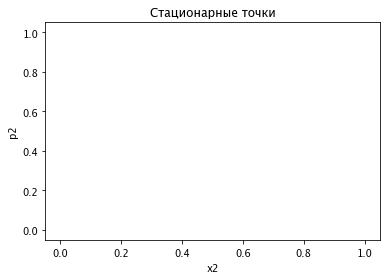

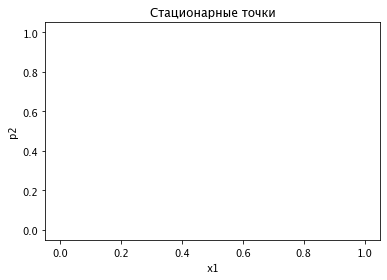

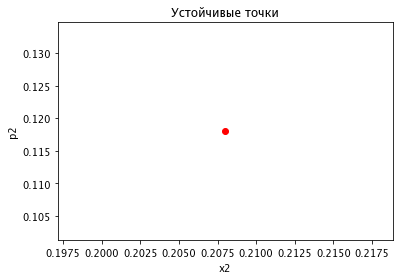

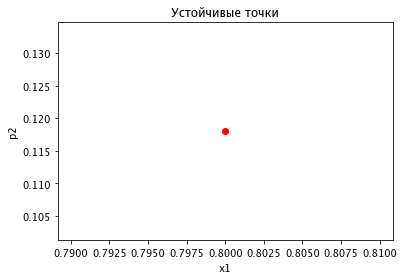

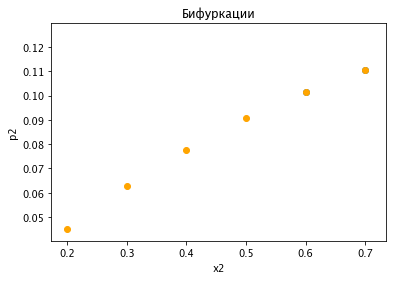

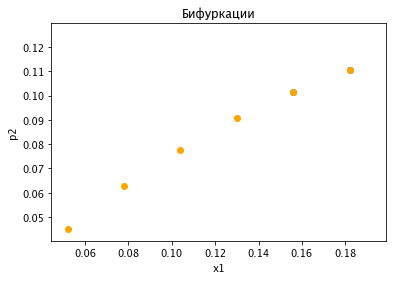

 Параметры: 
 p1 = 0.5, p3 = inf, p4 = 12 , p5 = 0.8, p6 = 0


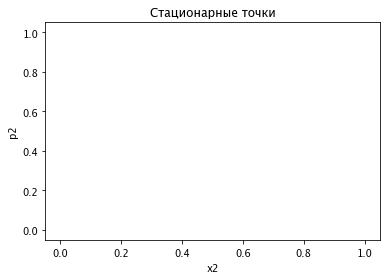

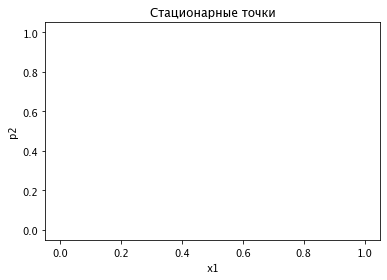

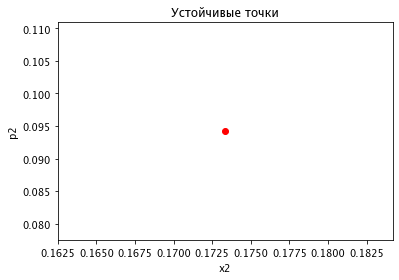

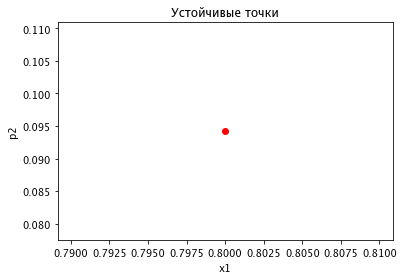

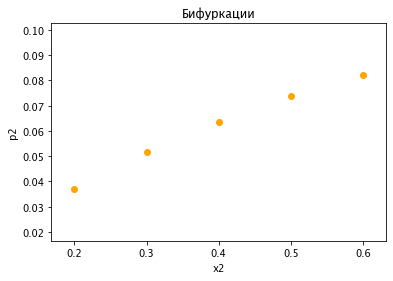

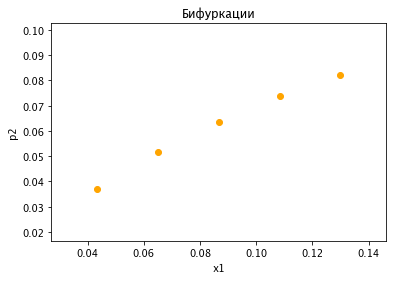

 Параметры: 
 p1 = 0.5, p3 = inf, p4 = 14 , p5 = 0.8, p6 = 0


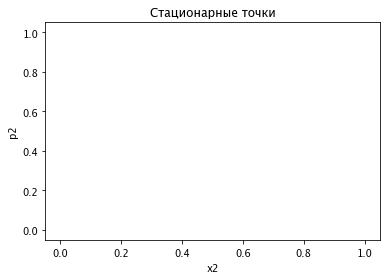

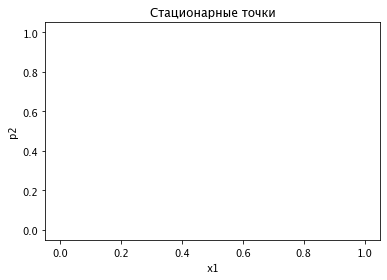

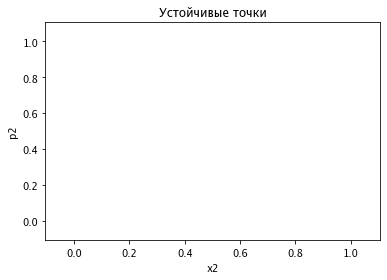

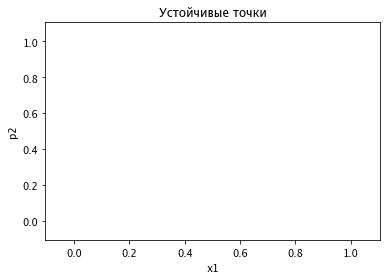

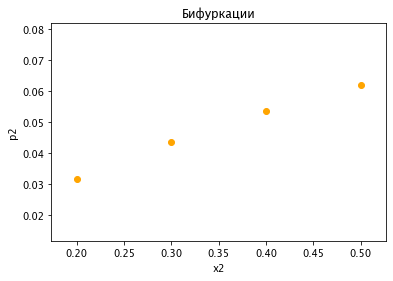

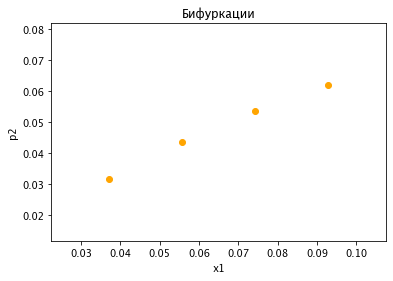

In [230]:
print(' Вариант Б ')

p1 = 0.5
p3 = math.inf
p4_ = [8,10,12,14]
p5 = 0.8
p6 = 0
for p4 in p4_:
    process((p1, p3, p4, p5, p6))